In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import math
from scipy.optimize import least_squares

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [38]:
def cut_tails(array):
    array_cut = []
    q75, q25 = np.percentile(array, [75, 25])
    interval = q75 - q25
    
    min_dist = q25 - (1.5 * interval)
    max_dist = q75 + (1.5 * interval)
    
    for data in array:
        if data < max_dist and data > min_dist:
            array_cut.append(data)
    return array_cut

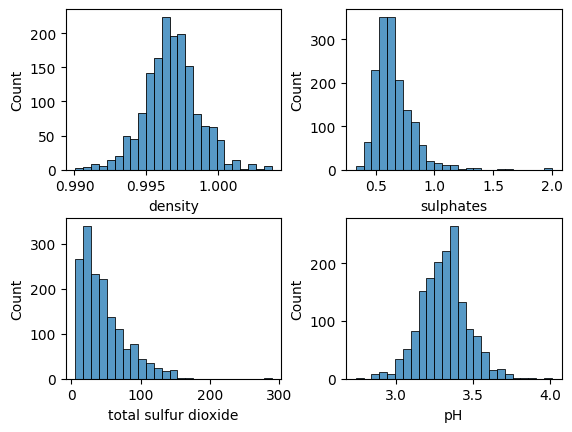

In [5]:
df = df[['density','sulphates','total sulfur dioxide', 'pH']]

fig = plt.figure()

for index, column in enumerate(df):
    ax = plt.subplot(2,2,index+1)
    sns.histplot(df[column], bins=cols_number(df),ax=ax)
    plt.subplots_adjust(hspace=0.3)
    plt.subplots_adjust(wspace=0.3)
    plt.plot()
    

In [4]:
def cols_number(df):
    return int(np.around(1+3.32*np.log(len(df))))

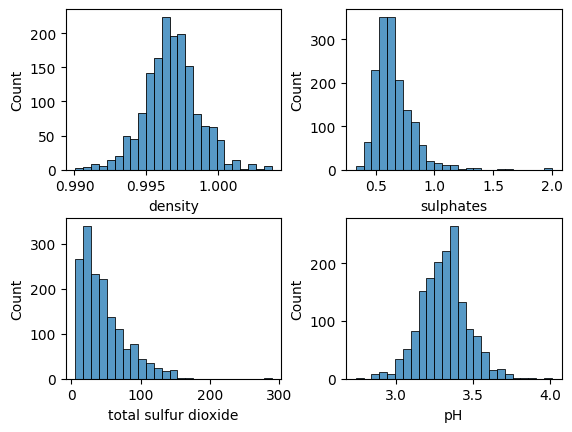

In [15]:
fig = plt.figure()

for index, column in enumerate(df):
    ax = plt.subplot(2,2,index+1)
    sns.histplot(df[column], bins=cols_number(df),ax=ax)
    plt.subplots_adjust(hspace=0.3)
    plt.subplots_adjust(wspace=0.3)
    plt.plot()

In [40]:
df.describe()

,density,sulphates,total sulfur dioxide,pH
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.996747,0.658149,46.467792,3.311113
std,0.001887,0.169507,32.895324,0.154386
min,0.990070,0.330000,6.000000,2.740000
25%,0.995600,0.550000,22.000000,3.210000
50%,0.996750,0.620000,38.000000,3.310000
75%,0.997835,0.730000,62.000000,3.400000
max,1.003690,2.000000,289.000000,4.010000


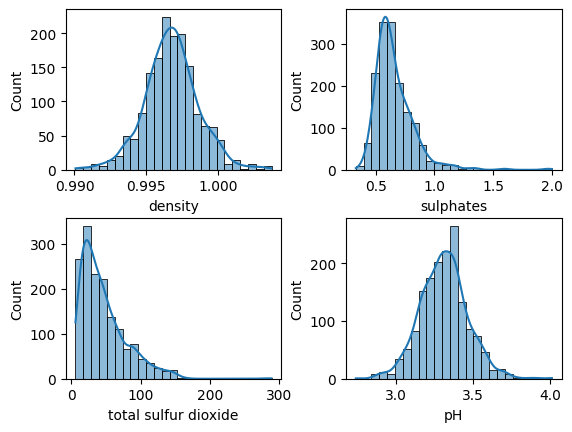

In [16]:
fig = plt.figure()

for index, column in enumerate(df):
    ax = plt.subplot(2,2,index+1)
    sns.histplot(df[column], bins=cols_number(df),kde=True,ax=ax)
    plt.subplots_adjust(hspace=0.3)
    plt.subplots_adjust(wspace=0.3)
    plt.plot()

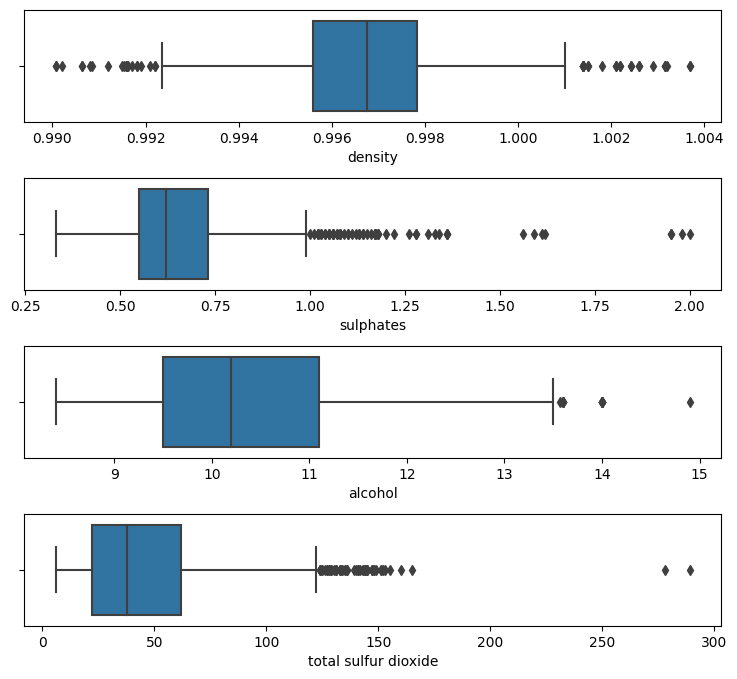

In [104]:
fig= plt.figure(figsize = (9,8))

for index, column in enumerate(df):
    ax = plt.subplot(4,1,index+1)
    sns.boxplot(data = df, x= column, ax= ax)
    plt.subplots_adjust(hspace=0.5)
    plt.subplots_adjust(wspace=0.3)
    plt.plot()

In [43]:
distributions = [scipy.stats.norm, scipy.stats.logistic, scipy.stats.gamma, scipy.stats.beta, scipy.stats.alpha]

In [77]:
MLE_df = pd.DataFrame(columns = df.columns,index = ['norm_gen', 'logistic_gen', 'gamma_gen', 'beta_gen','alpha_gen'])

In [84]:
MLE_df

,density,sulphates,total sulfur dioxide,pH
norm_gen,"(0.9967466791744841, 0.0018867437008323914)","(0.6581488430268917, 0.16945396724179546)","(46.46779237023139, 32.88503665178374)","(3.3111131957473416, 0.15433818141060165)"
logistic_gen,"(0.9967333996520806, 0.0010376774766219677)","(0.6379835138987406, 0.0829229946419873)","(42.06934862376931, 17.551838084497604)","(3.3095177374890055, 0.08618406085263104)"
gamma_gen,"(1091.5254199858857, 0.9344120446006323, 5.710...","(4.920319668821792, 0.32225833534719883, 0.068...","(1.5305039251277879, 5.872757712760863, 26.523...","(234.61338524815005, 0.9484846967421114, 0.010..."
beta_gen,"(1172.120681493318, 18988.226159683647, 0.9301...","(4.926915454505812, 3041053530411.89, 0.322202...","(1.5296920341065867, 796650.8728227504, 5.8731...","(26.381180988765532, 50.334386320117474, 2.320..."
alpha_gen,"(1112.6798236812847, -1.102457088466771, 2335....","(4.751533364066029, 0.009627956341976433, 2.92...","(3.1860524930447465, -39.58152165652927, 244.1...","(29.638032365977807, -1.2619403154369762, 135...."


In [71]:
MLE_df.loc['norm_gen','density'] = 1

In [72]:
MLE_df

,density,sulphates,total sulfur dioxide,pH
norm_gen,1,NaN,NaN,NaN
logistic_gen,NaN,NaN,NaN,NaN
gamma_gen,NaN,NaN,NaN,NaN
beta_gen,NaN,NaN,NaN,NaN
alpha_gen,NaN,NaN,NaN,NaN
0,1,NaN,NaN,NaN


In [149]:
def plot_dists(df, column,ax):
    for index, distribution in enumerate(distributions):
        x_plot = np.linspace(np.min(df[column]), np.max(df[column]), 100)
        y_plot = distribution.pdf(x_plot, *distribution.fit(df[column]))
        sns.histplot(data = df, x = column, stat='density', color = '#E0FFFF',ax=ax)
        sns.lineplot(x_plot, y_plot, label=type(distribution).__name__,ax=ax)
    
        MLE_df.loc[type(distribution).__name__, column] = distribution.fit(df[column])

        

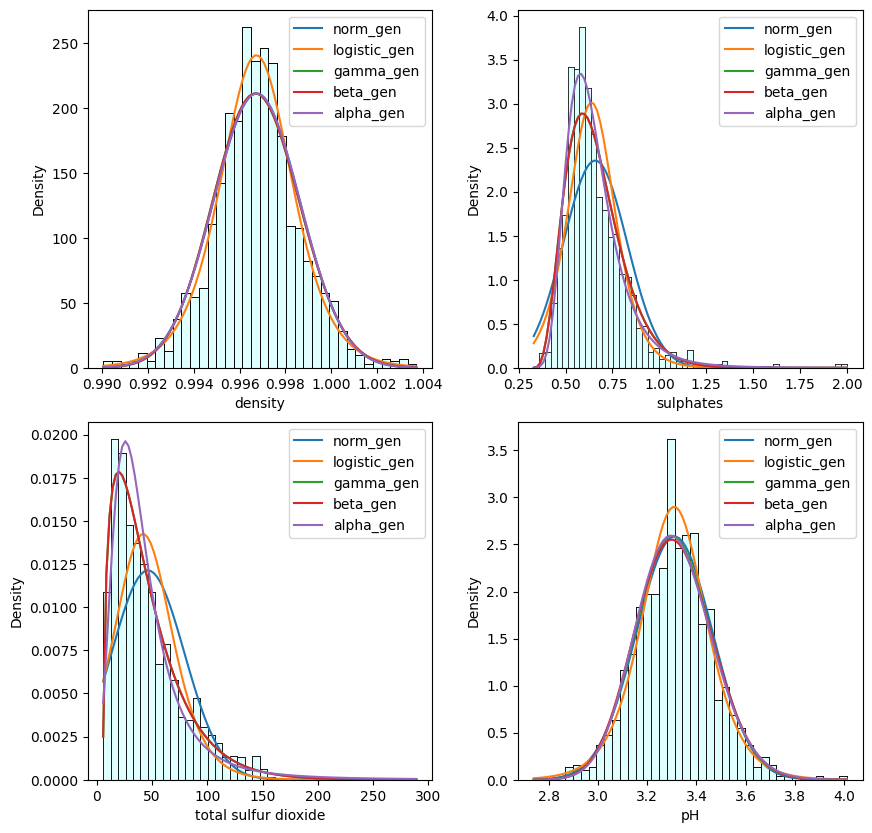

In [151]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
for index, column in enumerate(df):
    ax = plt.subplot(2,2,index+1)
    plot_dists(df, column,ax)
    plt.subplots_adjust(hspace=0.15)
    plt.subplots_adjust(wspace=0.25)
    plt.savefig('MLE')
    plt.plot()

In [91]:
def ls_cont(array, distribution):
    x0 = distribution.fit(array)
    def func(x):
        list_quant = np.arange(0,1,0.05)
        xdata = np.quantile(array, list_quant)[1:]
        diff = (abs((distribution.ppf(list_quant, *x)[1:]) - xdata)**2).sum()
        return diff
    res = least_squares(func, x0)
    return res.x

In [104]:
LS_df = pd.DataFrame(columns = df.columns,index = ['norm_gen', 'logistic_gen', 'gamma_gen', 'beta_gen','alpha_gen'])

In [119]:
LS_df

,density,sulphates,total sulfur dioxide,pH
norm_gen,"(0.9967466791744841, 0.0018867437008323914)","(0.6581488430268917, 0.16945396724179546)","(46.46779237023139, 32.88503665178374)","(3.3111131957473416, 0.15433818141060165)"
logistic_gen,"(0.9967333996520806, 0.0010376774766219677)","(0.6379835138987406, 0.0829229946419873)","(42.06934862376931, 17.551838084497604)","(3.3095177374890055, 0.08618406085263104)"
gamma_gen,"(1091.5254199858857, 0.9344120446006323, 5.710...","(4.920319668821792, 0.32225833534719883, 0.068...","(1.5305039251277879, 5.872757712760863, 26.523...","(234.61338524815005, 0.9484846967421114, 0.010..."
beta_gen,"(1172.120681493318, 18988.226159683647, 0.9301...","(4.926915454505812, 3041053530411.89, 0.322202...","(1.5296920341065867, 796650.8728227504, 5.8731...","(26.381180988765532, 50.334386320117474, 2.320..."
alpha_gen,"(1112.6798236812847, -1.102457088466771, 2335....","(4.751533364066029, 0.009627956341976433, 2.92...","(3.1860524930447465, -39.58152165652927, 244.1...","(29.638032365977807, -1.2619403154369762, 135...."


In [152]:
def plot_ls_dists(column, label, ax=ax):
    for index, distribution in enumerate(distributions):
        args = ls_cont(column, distribution)

        sns.histplot(column, stat='density',color='#E0FFFF',ax=ax)

        x_plot = np.linspace(np.min(column), np.max(column), 100)
        y_plot = distribution.pdf(x_plot, *args)
        sns.lineplot(x_plot, y_plot, label=type(distribution).__name__,ax=ax)
        
        LS_df.loc[type(distribution).__name__,label] = distribution.fit(column)

# plot_ls_dists(df['density'], 'density')
#|ls_distplot(df.age, 'age')

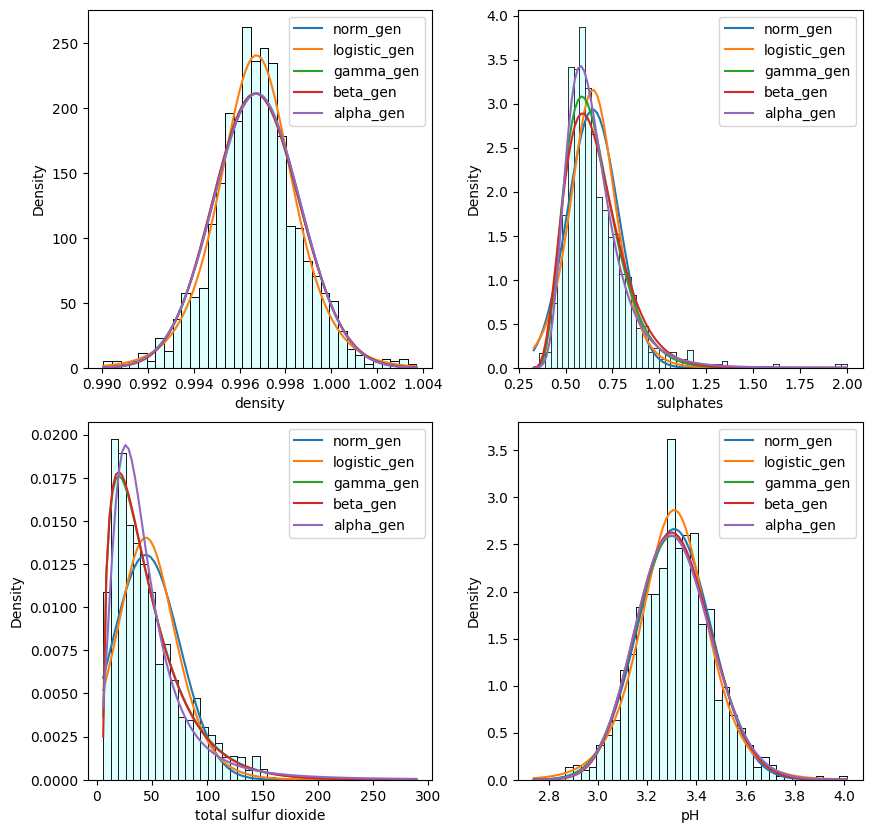

In [153]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
for index, column in enumerate(df):
    ax = plt.subplot(2,2,index+1)
    plot_ls_dists(df[column], column,ax=ax)
    plt.subplots_adjust(hspace=0.15)
    plt.subplots_adjust(wspace=0.25)
    plt.savefig('LS.png')
    plt.plot()

In [284]:
df.columns

Index(['density', 'sulphates', 'alcohol', 'total sulfur dioxide'], dtype='object')

In [121]:
def qq_plot(column, distribution, label,ax):
    args = distribution.fit(column)
    print(f'[{label}]:', 'Распределение', type(distribution).__name__, 'аргументы:', args)
    scipy.stats.probplot(column, dist=distribution, sparams=(args), plot=ax)

[density]: Распределение logistic_gen аргументы: (0.9967266648389789, 0.0009490568176989429)
[sulphates]: Распределение alpha_gen аргументы: (8.158388536797776, -0.3143444591339293, 7.637199920819802)
[total sulfur dioxide]: Распределение gamma_gen аргументы: (1.7019111408534355, 5.7636638211786355, 21.787218020618443)
[pH]: Распределение beta_gen аргументы: (8.312352366229717, 8.77674081377637, 2.7270622164283655, 1.1959401863140238)


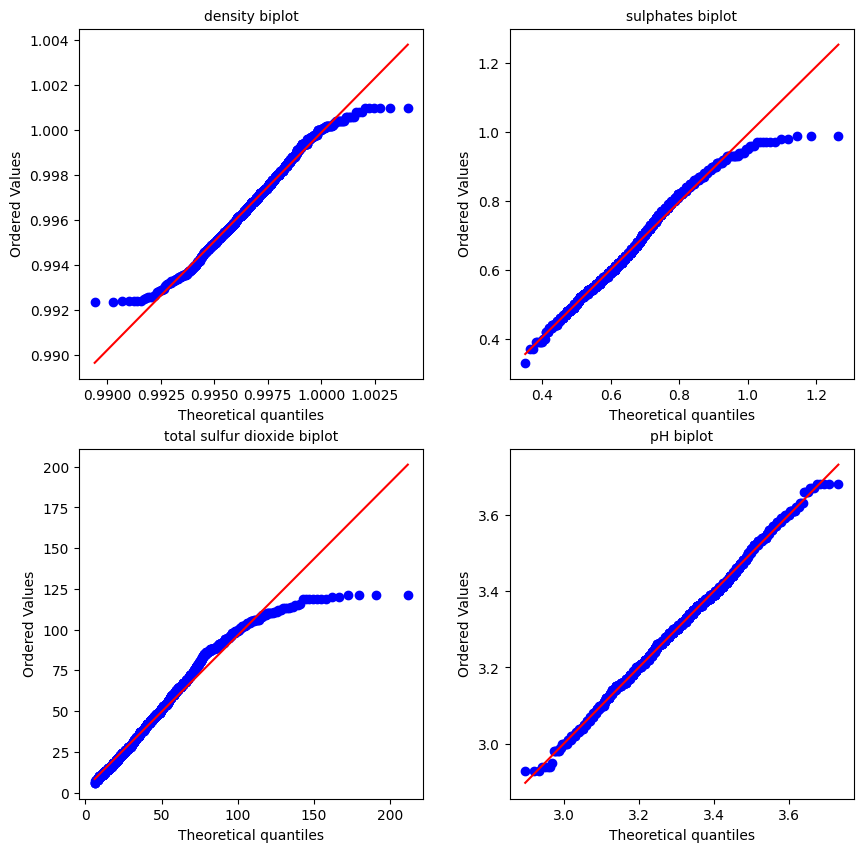

In [134]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
final_distributions = [scipy.stats.logistic, scipy.stats.alpha, scipy.stats.gamma, scipy.stats.beta]
for index, column in enumerate(df):
    ax = plt.subplot(2,2,index+1)
    qq_plot(cut_tails(df[column]), distribution = final_distributions[index], label = column,ax=ax)
    plt.subplots_adjust(hspace=0.2)
    plt.subplots_adjust(wspace=0.25)
    plt.title(f'{column} biplot', fontsize=10)
    plt.savefig('qq_biplots.png')
    plt.plot()

In [124]:
def stat_tests(array, distribution, cdf):
    args = distribution.fit(array)
    kstest = scipy.stats.kstest(array, cdf=cdf, args=args).pvalue
    omega2 = scipy.stats.cramervonmises(array, cdf=cdf, args=args).pvalue
    print('Критерий Колмагорова-Смирнова: {:.4f}'.format(kstest))
    print('Критерий Омега-квадрат: {:.4f}'.format(omega2))


In [63]:
stat_tests(cut_tails(df['density']), distribution=scipy.stats.gamma, cdf='gamma')

Критерий Колмагорова-Смирнова: 0.1897
Критерий Омега-квадрат: 0.4546


In [54]:
stat_test_cont(cut_tails(df['sulphates']), distribution=scipy.stats.alpha, cdf='alpha')

Критерий Колмагорова-Смирнова: 0.0025
Критерий Омега-квадрат: 0.0374


In [138]:
stat_test_cont(cut_tails(df['total sulfur dioxide']), distribution=scipy.stats.gamma, cdf='gamma')

Критерий Колмагорова-Смирнова: 0.1244
Критерий Омега-квадрат: 0.1447


In [41]:
stat_test_cont(cut_tails(df['pH']), distribution=scipy.stats.beta, cdf='beta')

Критерий Колмагорова-Смирнова: 0.0973
Критерий Омега-квадрат: 0.3308


In [154]:
final_distributions = [scipy.stats.logistic, scipy.stats.alpha, scipy.stats.gamma, scipy.stats.beta]

In [6]:
# Семплирование непрерывной СВ методом обратной функции
def inverse_sample_plot(column, distribution, plot = True):
    args = distribution.fit(column)
    x_array = np.random.rand(2000)
    inverse = distribution.ppf(x_array, *args)
    if plot == True:
        sns.histplot(column, stat='density', label = 'validation',color='#E0FFFF')
        sns.kdeplot(x=inverse, label = 'sample')
        plt.title(f'{column} biplot', fontsize=10)
        plt.legend()
    
    return inverse


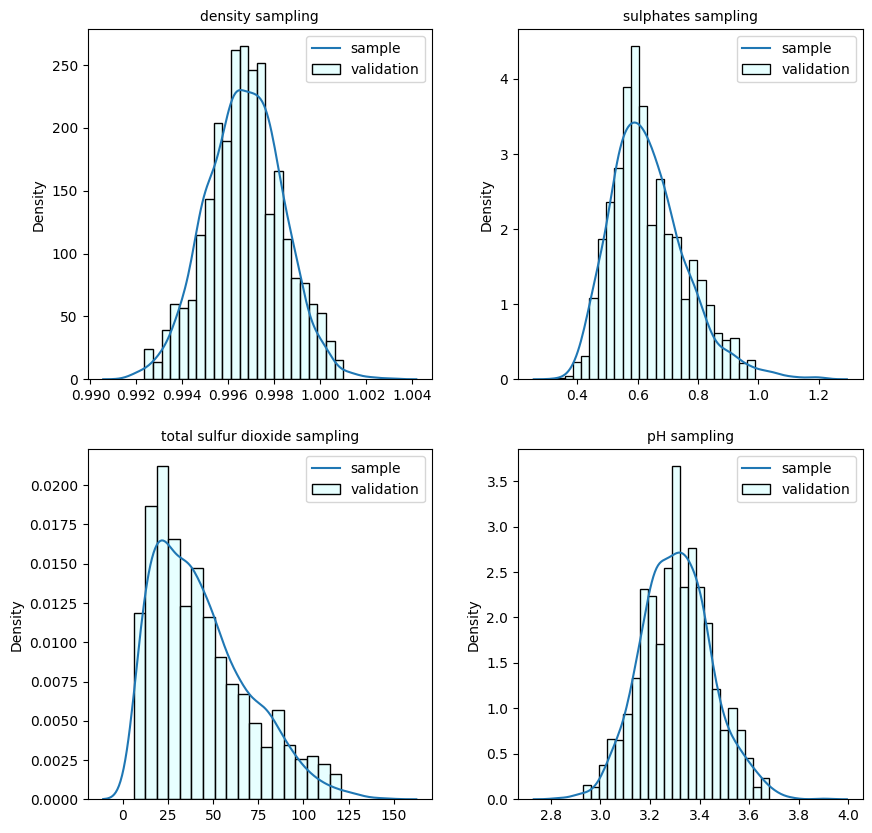

In [146]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
final_distributions = [scipy.stats.norm, scipy.stats.gamma, scipy.stats.beta,scipy.stats.alpha]
for index, column in enumerate(df):
    ax = plt.subplot(2,2,index+1)
    inverse_sample_plot(cut_tails(df[column]), final_distributions[index], plot = True)
    plt.subplots_adjust(hspace=0.2)
    plt.subplots_adjust(wspace=0.25)
    plt.title(f'{column} sampling', fontsize=10)
    plt.savefig('обратная_функция.png')
    plt.plot()

In [36]:
def qqplot(column, validation_sample, sample, title):
    """Построение графика квантиль-квантиль"""
    sample_values = sample
    validation_sample_values = validation_sample[column].values

    df_pct = pd.DataFrame()
    df_pct['q_sample'] = np.percentile(sample_values, range(100))
    df_pct['q_validation'] = np.percentile(validation_sample_values, range(100))

    ax.scatter(x='q_validation', y='q_sample', data=df_pct, label='Actual fit');
    sns.lineplot(x='q_validation', y='q_validation', data=df_pct, color='r', label='Line of perfect fit');
    ax.set_xlabel('Quantile for validation sample')
    ax.set_ylabel('Quantile for fit sample')
    ax.legend()
    ax.set_title(f"QQ plot. {title}.");

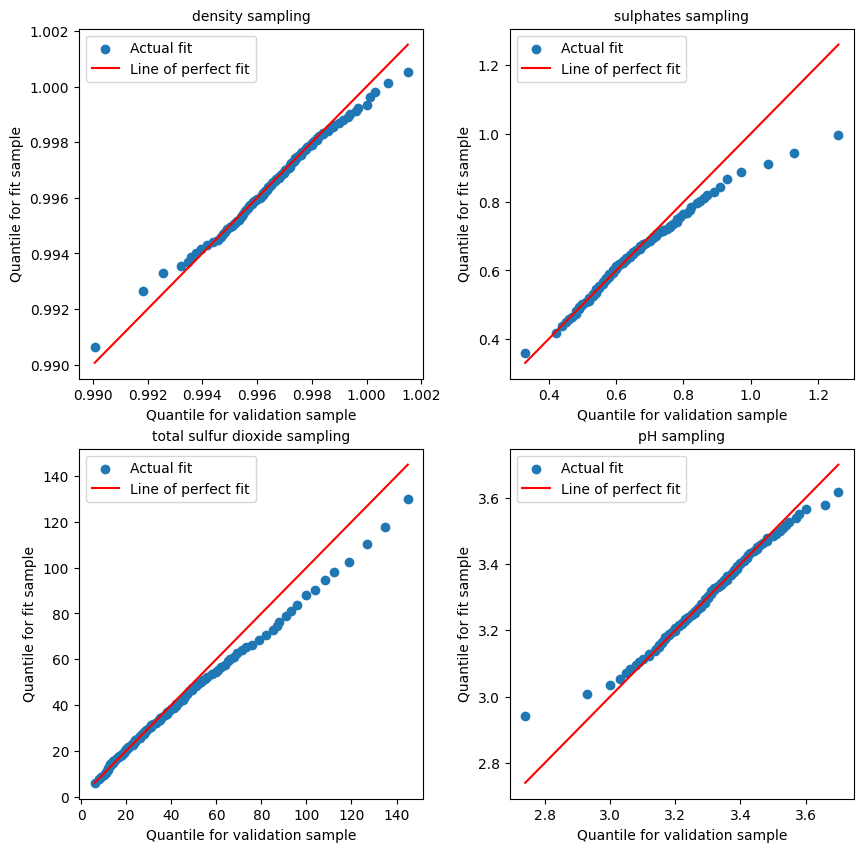

In [147]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
final_distributions = [scipy.stats.norm, scipy.stats.alpha, scipy.stats.gamma,scipy.stats.beta]
for index, column in enumerate(df):
    ax = plt.subplot(2,2,index+1)
    qqplot(column, df, inverse_sample_plot(cut_tails(df[column]), final_distributions[index], plot = False),'title')
    plt.subplots_adjust(hspace=0.2)
    plt.subplots_adjust(wspace=0.25)
    plt.title(f'{column} sampling', fontsize=10)
    plt.savefig('обратная_функция_qqplot.png')
    plt.plot()
    

In [10]:
def plot_th_distr(column, distribution, params, M):
    x_array = np.linspace(np.min(column), np.max(column), 100)
    
    norm_params = scipy.stats.norm.pdf(x_array, *params)
    dist_params = distribution.fit(column)
    
    y_array = distribution.pdf(x_array, *dist_params)
    
    sns.lineplot(x_array, y_array, label=type(distribution).__name__)
    plt.plot(x_array, M*norm_params, label='norm_gen')
    
#     plt.xticks(fontsize = 10)
#     plt.yticks(fontsize = 10)
    plt.legend(fontsize=10)

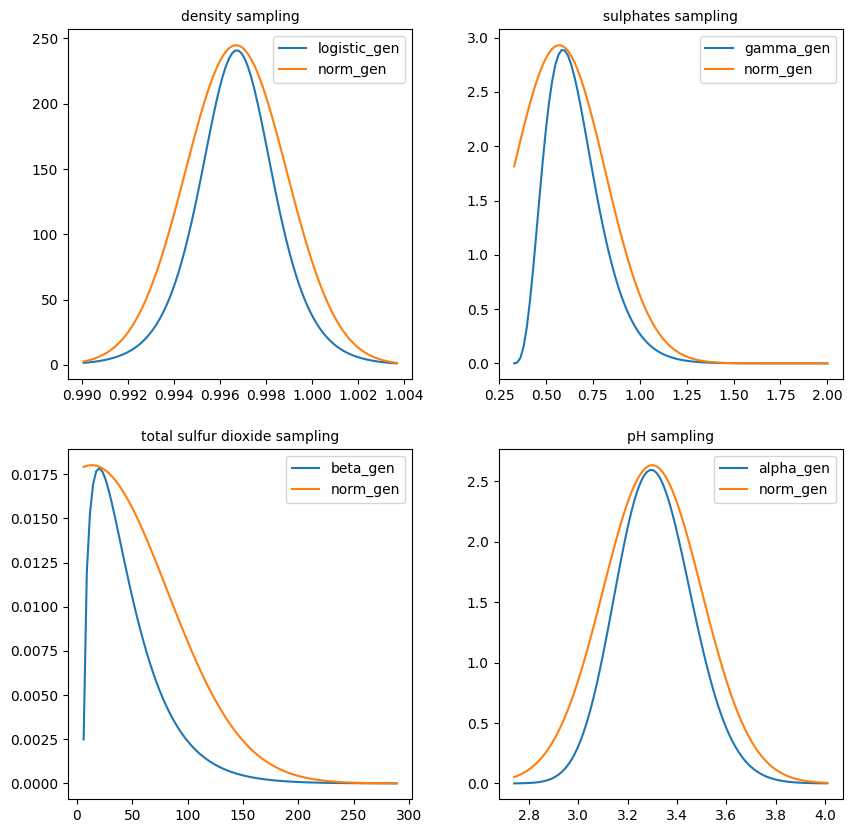

In [141]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
final_distributions = [scipy.stats.logistic, scipy.stats.gamma, scipy.stats.beta,scipy.stats.alpha]
finish_locscales = [[0.9967,0.0022],[0.57, 0.245],[13.32,68.2],[3.3,0.2]]
m_list = [1.35,1.8,3.08, 1.32]

for index, column in enumerate(df):
    ax = plt.subplot(2,2,index+1)
    plot_th_distr(df[column],final_distributions[index],finish_locscales[index],m_list[index])
    plt.subplots_adjust(hspace=0.2)
    plt.subplots_adjust(wspace=0.25)
    plt.title(f'{column} sampling', fontsize=10)
    plt.savefig('reject_sampling.png')
    plt.plot()
    

In [34]:
def accept_reject(column, distribution, params, M, plot):
    dist_params = distribution.fit(column)
    samples = []
    N = 5000
    for i in range(N):
        x = np.random.normal(*params)
        prob = distribution.pdf(x, *dist_params)/(M*scipy.stats.norm.pdf(x, *params))
        if np.random.random() < prob:
            samples.append(x)
    if plot == True:
        plt.hist(samples, bins=cols_number(column), density=True, label = 'sample',color = '#E0FFFF')
        x_array = np.linspace(np.min(column), np.max(column), 100)
        y_array = distribution.pdf(x_array, *dist_params)
        sns.lineplot(x_array, y_array, label=type(distribution).__name__)
    return samples

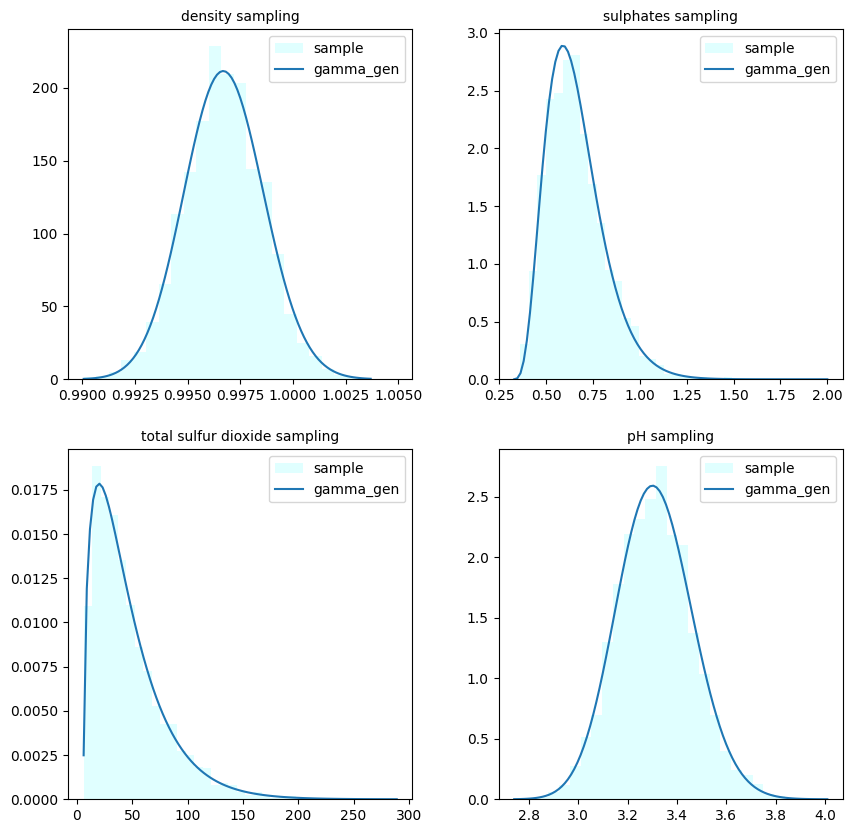

In [143]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
final_distributions = [scipy.stats.logistic, scipy.stats.gamma, scipy.stats.beta,scipy.stats.alpha]
finish_locscales = [[0.9967,0.0022],[0.57, 0.245],[13.32,68.2],[3.3,0.2]]
m_list = [1.35,1.8,3.08, 1.32]

for index, column in enumerate(df):
    ax = plt.subplot(2,2,index+1)
    accept_reject(df[column], scipy.stats.gamma,finish_locscales[index],m_list[index],plot=True)
    plt.subplots_adjust(hspace=0.2)
    plt.subplots_adjust(wspace=0.25)
    plt.title(f'{column} sampling', fontsize=10)
    plt.savefig('reject_sampling_result.png')
    plt.plot()
    

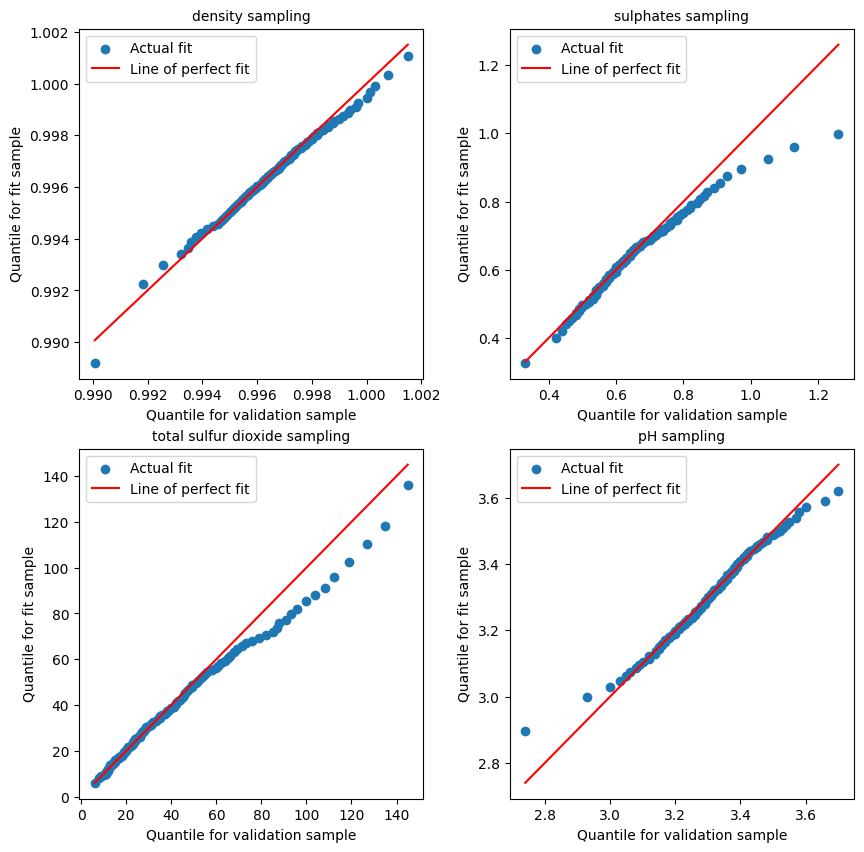

In [145]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
final_distributions = [scipy.stats.logistic, scipy.stats.alpha, scipy.stats.gamma, scipy.stats.beta]
for index, column in enumerate(df):
    ax = plt.subplot(2,2,index+1)
    qqplot(column, df, accept_reject(cut_tails(df[column]), final_distributions[index], finish_locscales[index],
                                     m_list[index],plot=False),'title')
    plt.subplots_adjust(hspace=0.2)
    plt.subplots_adjust(wspace=0.25)
    plt.title(f'{column} sampling', fontsize=10)
    plt.savefig('qq_plot_reject_sampling.png')
    plt.plot()
    